In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from pathlib import Path
base_path = Path('/content/drive/Shareddrives/KN Solvro/03. Projekty/Wakacyjne Wyzwanie 2025/ML/notebooki/1_Przetwarzanie i wizualizacja danych')

## Wstęp

W poprzednim wykładzie skupiliśmy się na analizie i przetwarzaniu danych (EDA), co można porównać do przygotowania składników przed gotowaniem. Teraz przyszedł czas na właściwe „gotowanie” — czyli zastosowanie algorytmów uczenia maszynowego przy pomocy biblioteki **scikit-learn (sklearn)**.

Ten wykład to twoje pierwsze spotkanie z praktycznym zastosowaniem modeli predykcyjnych. Dowiesz się, jak przekształcić dane tabelaryczne (te same, które analizowaliśmy wcześniej) w działający model, który potrafi coś przewidzieć lub sklasyfikować.

Wyjaśnimy, czym jest **klasyfikacja**, **regresja**, **uczenie nadzorowane i nienadzorowane**, a także krótko wspomnimy o **uczeniu ze wzmocnieniem** i **przetwarzaniu obrazów**.

Wprowadzimy również kilka podstawowych pojęć statystycznych, które stanowią fundament wielu algorytmów — m.in. **rozkłady prawdopodobieństwa**, **metoda maksymalnej wiarygodności (MLE)** oraz intuicje stojące za klasyfikatorami **Bayesowskimi**.

Poznasz też podstawowe modele, takie jak:

- **DummyClassifier/Regressor** — punkt odniesienia, który pokazuje, czy twój model w ogóle działa,
- **Drzewa decyzyjne (Decision Trees)** — intuicyjne i łatwe do zrozumienia,
- **KNN (K-Nearest Neighbors)** — z wykorzystaniem np. **cosine similarity** do mierzenia podobieństwa,
- **Regresja liniowa (Linear Regression)** — klasyk analizy danych,
- **SVM (Support Vector Machines)** — potężne, choć bardziej złożone,
- **MLP (Multilayer Perceptron)** — czyli podstawowa wersja sieci neuronowych.

Przed nami notebook, który wprowadzi Cię w praktykę :)

Podobnie jak ostatnim razem, w notebooku napotkasz następujące symbole:

- ❓ *dodatkowe zagadnienie do samodzielnej realizacji, które pozwoli ci jeszcze bardziej poszerzyć wiedzę*,  
- 💡 *wprowadza ważne, prawdopodobnie nieznane ci narzędzie w Pythonie lub pojęcie, które warto zapamiętać*,  
- ☝ *wskazuje na miejsca potencjalnych błędów czy pomyłek*.


## 0. Wprowadzenie do statystyki

### 0.0 Rozkłady prawdopodobieństwa
Rozkład prawdopodobieństwa opisuje, jak bardzo prawdopodobne są różne wartości przyjmowane przez zmienną losową.

W praktyce oznacza to: jak często coś może się zdarzyć, jeśli powtórzylibyśmy eksperyment wiele razy.
Przykład: jeśli rzucimy uczciwą kostką, każda liczba (od 1 do 6) ma szansę 1/6.

Rozkłady mogą być:

Dyskretne – mają skończoną lub policzalną liczbę możliwych wartości (np. liczba dzieci w rodzinie),

Ciągłe – mogą przyjąć dowolną wartość z pewnego przedziału (np. temperatura, wzrost).

W uczeniu maszynowym często zakładamy, że dane pochodzą z określonego rozkładu prawdopodobieństwa — nawet jeśli w rzeczywistości jest to uproszczenie. Choć rozkłady idealne (np. normalny, jednostajny, wykładniczy) rzadko dokładnie występują w naturze, są one niesamowicie przydatne w analizie i modelowaniu danych. Możemy również używać rozkładów prawdopodobieństwa do generowania danych pochodzących z tego rozkładu.

❓ Pole pod wykresem funckji przedstawiającej rozkład prawdopodobieństwa jest zawsze równe 1, zastanów się czemu?

💡 W Pythonie popularną biblioteką do pracy z rozkładami jest scipy.stats.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### 0.0.1 Rozkład jednostajny
Rozkład ten zakłada, że wszystkie wartości w zadanym zakresie są równie prawdopodobne.
Przykład: rzut uczciwą kostką

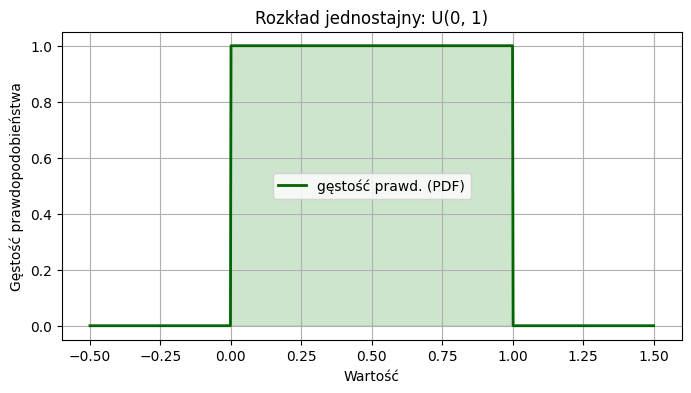

In [ ]:
from scipy.stats import uniform

a, b = 0, 1
x = np.linspace(-0.5, 1.5, 1000)
pdf = uniform.pdf(x, loc=a, scale=b - a)

plt.figure(figsize=(8, 4))
plt.plot(x, pdf, color='darkgreen', lw=2, label='gęstość prawd. (PDF)')
plt.fill_between(x, pdf, alpha=0.2, color='green')
plt.title('Rozkład jednostajny: U(0, 1)')
plt.xlabel('Wartość')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend()
plt.grid(True)
plt.show()


💡 Zauważ, że im większa liczba wygenerowanych próbek (size), tym bardziej histogram przypomina teoretyczny rozkład — słupki stają się "równiejsze" i lepiej odwzorowują rzeczywistą gęstość prawdopodobieństwa.

❓ Zmień zakres rozkładu (np. U(5, 10)). Czy gęstość nadal jest stała?

#### 0.0.2 Rozkład normalny (Normal / Gaussowski)
Rozkład normalny (Gaussa) to najważniejszy rozkład w statystyce i ML.
Większość danych naturalnych (np. wzrost, temperatura) w przybliżeniu podlega temu rozkładowi.

Charakterystyka:

* Dzwonowaty kształt,

* Symetryczny względem średniej (
𝜇
μ),

* Zdefiniowany przez dwa parametry: średnia (𝜇) i odchylenie standardowe (𝜎).

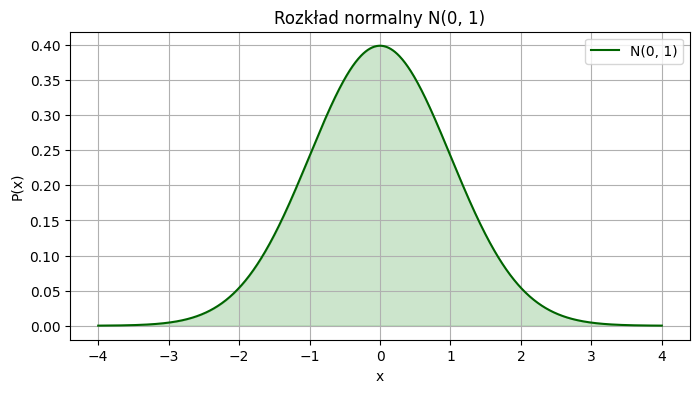

In [ ]:
from scipy.stats import norm

mu = 0
sigma = 1
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, mu, sigma)

plt.figure(figsize=(8, 4))
plt.plot(x, pdf, label='N(0, 1)', color='darkgreen')
plt.fill_between(x, pdf, alpha=0.2, color='green')
plt.title('Rozkład normalny N(0, 1)')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend()
plt.grid(True)
plt.show()


#### 0.0.3 Rozkład wykładniczy (Exponential Distribution)

Ten rozkład opisuje czas czekania na zdarzenie.
Przykład: czas do nadejścia klienta do sklepu, czas między awariami urządzenia.

Parametr 𝜆 (w scipy: scale = 1/λ) określa "tempo", z jakim zdarzenia się pojawiają.

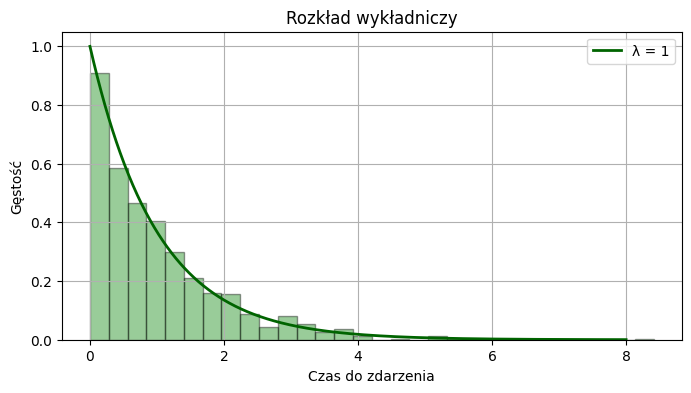

In [ ]:
from scipy.stats import expon

scale = 1.0  # λ = 1
data = expon.rvs(scale=scale, size=1000)

plt.figure(figsize=(8, 4))
plt.hist(data, bins=30, density=True, alpha=0.4, color='green', edgecolor='black')
x = np.linspace(0, 8, 1000)
plt.plot(x, expon.pdf(x, scale=scale), 'darkgreen', lw=2, label='λ = 1')
plt.title('Rozkład wykładniczy')
plt.xlabel('Czas do zdarzenia')
plt.ylabel('Gęstość')
plt.legend()
plt.grid(True)
plt.show()

#### 0.0.4
Rozszerzenie rozkładu normalnego na 2 cechy. Używany m.in. w analizie głównych składowych (PCA) i modelach probabilistycznych.


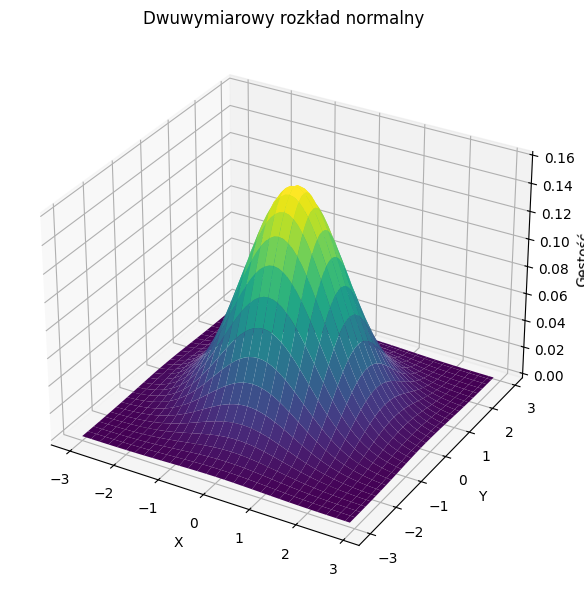

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

x, y = np.mgrid[-3:3:.1, -3:3:.1]
pos = np.dstack((x, y))

mean = [0, 0]
cov = [[1, 0], [0, 1]]

rv = multivariate_normal(mean, cov)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, rv.pdf(pos), cmap='viridis', linewidth=0)
ax.set_title('Dwuwymiarowy rozkład normalny')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Gęstość')
plt.tight_layout()
plt.show()


❓ Zmień parametry rozkładów (np. odchylenie standardowe, zakresy, skalę) i sprawdź, jak zmieniają się wykresy.

### 0.1 MLE — Metoda Maksymalnej Wiarygodności (Maximum Likelihood Estimation)
MLE to jedna z najważniejszych metod w statystyce i uczeniu maszynowym.
Pomaga odpowiedzieć na pytanie:

„*Jakie parametry rozkładu najlepiej tłumaczą moje dane?*”

Załóżmy, że zebraliśmy dane, np. pomiar czasu dostawy paczki.
Podejrzewamy, że dane pochodzą z rozkładu normalnego, ale nie znamy średniej ani odchylenia.

MLE pomaga nam znaleźć takie parametry (𝜇 σ), które maksymalizują prawdopodobieństwo zaobserwowanych danych.

Mówiąc prosto: znajdujemy taki rozkład, który najlepiej „pasuje” do naszych danych.

💡 MLE szuka tych wartości parametrów, przy których dane, które widzimy, byłyby jak najbardziej prawdopodobne, gdyby rzeczywiście pochodziły z danego rozkładu.




In [ ]:
# "Zaobserwowane" dane (np. czasy dostawy pizzy)
np.random.seed(0)
data = np.random.normal(loc=30, scale=5, size=100)  # prawdziwe parametry: μ=30, σ=5

# MLE: estymacja parametrów
mle_mu = np.mean(data)
mle_sigma = np.std(data, ddof=0)  # ddof=0 → MLE, a nie estymator nieobciążony

print(f"Estymowana średnia (MLE): {mle_mu:.2f}")
print(f"Estymowane odchylenie (MLE): {mle_sigma:.2f}")


Estymowana średnia (MLE): 30.30
Estymowane odchylenie (MLE): 5.04


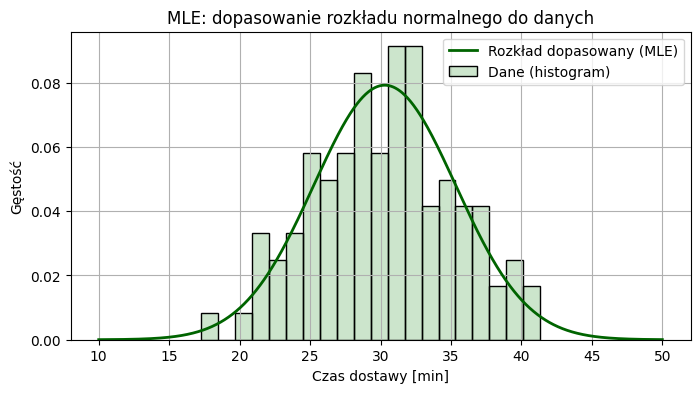

In [ ]:
import seaborn as sns

x = np.linspace(10, 50, 1000)
pdf = norm.pdf(x, mle_mu, mle_sigma)

plt.figure(figsize=(8, 4))
sns.histplot(data, bins=20, stat="density", color="green", alpha=0.2, label="Dane (histogram)")
plt.plot(x, pdf, color='darkgreen', lw=2, label='Rozkład dopasowany (MLE)')
plt.title("MLE: dopasowanie rozkładu normalnego do danych")
plt.xlabel("Czas dostawy [min]")
plt.ylabel("Gęstość")
plt.legend()
plt.grid(True)
plt.show()


💡 MLE nie potrzebuje znać prawdziwych parametrów — szacuje je tylko na podstawie danych.

❓ Zmień `loc` i `scale` w funkcji `np.random.normal()` i sprawdź, czy MLE potrafi dobrze oszacować nowe parametry.

☝ W `np.std()` używaj `ddof=0`, jeśli chcesz zgodności z MLE. Domyślna wartość (`ddof=1`) daje estymator nieobciążony, ale nie jest to MLE!

### 0.2 Twierdzenie Bayesa — aktualizowanie wiedzy
Twierdzenie Bayesa to fundament statystyki i uczenia maszynowego, zwłaszcza w klasyfikacji probabilistycznej (np. Naive Bayes).

Często mamy jakieś przypuszczenie a priori (np. "większość maili to nie spam"), ale później pojawia się nowa informacja, która może zmienić nasze przekonanie.

Twierdzenie Bayesa pozwala odpowiedzieć na pytanie:

- „Jak bardzo powinienem uwierzyć w daną hipotezę, gdy wiem coś nowego?”

Twierdzenie Bayesa pozwala zaktualizować nasze wcześniejsze przekonanie (**a priori**) na podstawie nowej obserwacji (**danych**) i uzyskać **przekonanie po uwzględnieniu danych** (**a posteriori**).

Wzór Bayesa: $P(H \mid D) = \frac{P(D \mid H) \cdot P(H)}{P(D)}$

Gdzie:

- \( H \) — **hipoteza**, np. "to jest spam",
- \( D \) — **dane**, które obserwujesz, np. mail zawiera słowo „wygrana”,
- \( P(H) \) — prawdopodobieństwo **a priori**, zanim zobaczysz dane,
- \( P(D | H) \) — prawdopodobieństwo zobaczenia takich danych, **jeśli hipoteza jest prawdziwa**,
- \( P(H | D) \) — **zaktualizowane przekonanie** po uwzględnieniu danych (a posteriori).


#### Przykład: Klasyfikacja paczek jako uszkodzone / nieuszkodzone

Wyobraź sobie, że firma kurierska podaje następujące dane:

- 5% paczek jest uszkodzonych:  
  $$
  P(U) = 0.05
  $$

- Wśród **uszkodzonych paczek**, 90% ma etykietę **"OSTROŻNIE"**:  
  $$
  P(O \mid U) = 0.9
  $$

- Wśród **nieuszkodzonych paczek**, tylko 10% ma etykietę **"OSTROŻNIE"**:  
  $$
  P(O \mid \neg U) = 0.1
  $$

Gdzie:  
- $U$ – paczka jest uszkodzona  
- $\neg U$ – paczka **nie** jest uszkodzona  
- $O$ – paczka ma etykietę **"OSTROŻNIE"**

---

**❓ Pytanie:**  
Jeśli paczka ma etykietę _"OSTROŻNIE"_, to jak duże jest prawdopodobieństwo, że jest uszkodzona?

Innymi słowy, chcemy obliczyć:  
$$
P(U \mid O) = ?
$$

Rozwiązanie — w następnej komórce kodu.

In [ ]:
P_uszk = 0.05         # a priori
P_nieuszk = 1 - P_uszk

P_etykieta_uszk = 0.9
P_etykieta_nieuszk = 0.1

# P(D): całkowite prawdopodobieństwo etykiety
P_etykieta = P_etykieta_uszk * P_uszk + P_etykieta_nieuszk * P_nieuszk

# Twierdzenie Bayesa
P_uszk_given_etykieta = (P_etykieta_uszk * P_uszk) / P_etykieta

print(f"P(uszk | etykieta='OSTROŻNIE') = {P_uszk_given_etykieta:.2%}")


P(uszk | etykieta='OSTROŻNIE') = 32.14%


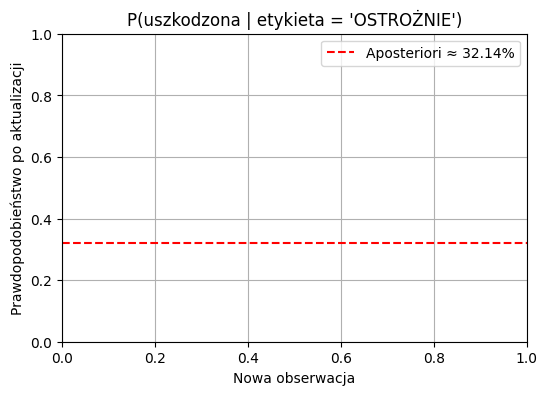

In [ ]:
P_uszk = 0.05
P_etykieta_uszk = 0.9
P_etykieta_nieuszk = 0.1
p_etykieta = np.linspace(0.01, 0.99, 100)

# Obliczmy a posteriori
posterior = (P_etykieta_uszk * P_uszk) / (P_etykieta_uszk * P_uszk + P_etykieta_nieuszk * (1 - P_uszk))

plt.figure(figsize=(6, 4))
plt.axhline(posterior, color='red', linestyle='--', label=f'Aposteriori ≈ {posterior:.2%}')
plt.title("P(uszkodzona | etykieta = 'OSTROŻNIE')")
plt.xlabel("Nowa obserwacja")
plt.ylabel("Prawdopodobieństwo po aktualizacji")
plt.legend()
plt.grid(True)
plt.show()

## 1. Regresja

### 1.0 MSE — Mean Squared Error (średni błąd kwadratowy)

W regresji chcemy przewidywać wartości liczbowe — np. cenę domu, czas oczekiwania, wzrost.  
Ale skąd wiemy, czy nasz model jest dobry?

Jednym z podstawowych mierników jakości regresji jest **MSE**:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2
$$

Gdzie:  
- $y_i$ — wartość rzeczywista (prawdziwa)  
- $\hat{y}_i$ — wartość przewidywana przez model  
- $n$ — liczba obserwacji

Im mniejsze MSE, tym lepsze dopasowanie modelu do danych.

💡 `scikit-learn` ma gotowe funkcje do obliczania MSE (`mean_squared_error`) oraz innych metryk jak MAE (`mean_absolute_error`) czy $R^2$ (`r2_score`).


### 1.1 Regresja liniowa

Załóżmy, że mamy dane: **powierzchnia mieszkania** → **cena mieszkania**.  
Chcemy dopasować prostą linię, która jak najlepiej opisuje zależność między zmiennymi.

Równanie regresji liniowej ma postać:

$$
\hat{y} = w \cdot x + b
$$

Gdzie:  
- $\hat{y}$ — przewidywana wartość (np. cena mieszkania),  
- $x$ — wartość wejściowa (np. powierzchnia),  
- $w$ — współczynnik kierunkowy (nachylenie),  
- $b$ — wyraz wolny (przecięcie z osią $y$).

Model uczy się wartości $w$ i $b$, tak aby **minimalizować błąd predykcji** (np. MSE).

💡 W `scikit-learn` możesz łatwo trenować modele regresji liniowej przy pomocy `LinearRegression`.


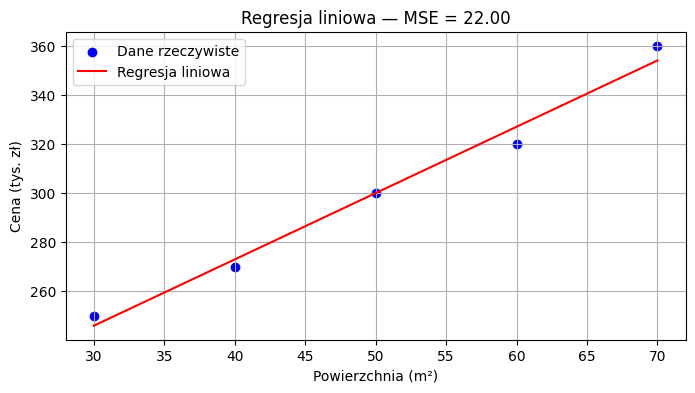

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dane przykładowe
X = np.array([[30], [40], [50], [60], [70]])
y = np.array([250, 270, 300, 320, 360])

# Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Błąd
mse = mean_squared_error(y, y_pred)

# Wykres
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue', label='Dane rzeczywiste')
plt.plot(X, y_pred, color='red', label='Regresja liniowa')
plt.title(f"Regresja liniowa — MSE = {mse:.2f}")
plt.xlabel("Powierzchnia (m²)")
plt.ylabel("Cena (tys. zł)")
plt.legend()
plt.grid(True)
plt.show()



💡 W regresji liniowej model dopasowuje prostą tak, aby MSE było jak najmniejsze.

❓ Zmień dane i sprawdź, kiedy linia jest niedopasowana.

### 1.2 Regresja wielomianowa

Nie każda zależność między zmiennymi jest liniowa.  
Jeśli dane układają się wzdłuż krzywej, warto zastosować **regresję wielomianową**.

Równanie takiego modelu wygląda następująco:

$$
\hat{y} = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k
$$

Gdzie:
- $x$ — zmienna wejściowa (np. czas, temperatura, powierzchnia),
- $\hat{y}$ — przewidywana wartość,
- $a_0, a_1, \dots, a_k$ — współczynniki modelu,
- $k$ — stopień wielomianu.

Regresja wielomianowa to tak naprawdę regresja liniowa, ale na **przekształconych (rozszerzonych) cechach** — czyli $x$, $x^2$, $x^3$, itd.

💡 W `scikit-learn` można łatwo przygotować dane do regresji wielomianowej za pomocą `PolynomialFeatures` z modułu `sklearn.preprocessing`.


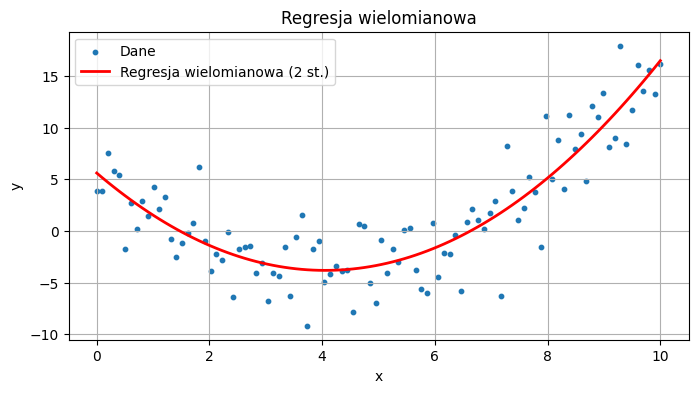

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Dane nieliniowe
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 0.5 * X.flatten()**2 - 4*X.flatten() + 5 + np.random.randn(100) * 3

# Model wielomianowy (stopień 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)
y_pred = poly_model.predict(X)

# Wykres
plt.figure(figsize=(8, 4))
plt.scatter(X, y, s=10, label='Dane')
plt.plot(X, y_pred, color='red', lw=2, label='Regresja wielomianowa (2 st.)')
plt.title("Regresja wielomianowa")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


❓ Zmień stopień wielomianu i zobacz, co się dzieje (np. 3, 5, 10).



### 1.3 Regresja przy dwóch zmiennych wejściowych (2D)
Co jeśli mamy więcej niż jedną cechę, np.:

powierzchnia mieszkania,

liczba pokoi
→ cena?

Pokażmy regresję z dwiema cechami wejściowymi.

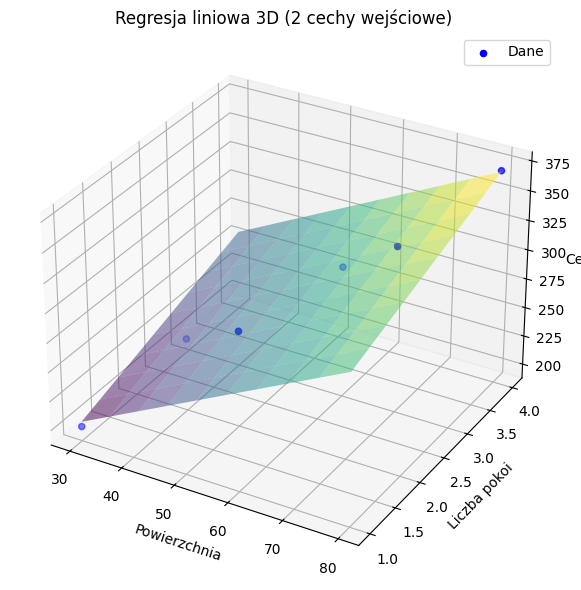

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Dane: [powierzchnia, liczba pokoi]
X = np.array([
    [30, 1],
    [40, 2],
    [50, 2],
    [60, 3],
    [70, 3],
    [80, 4]
])
y = np.array([200, 250, 270, 300, 330, 370])

# Trening
model = LinearRegression()
model.fit(X, y)

x_surf, y_surf = np.meshgrid(np.linspace(30, 80, 10), np.linspace(1, 4, 10))
z_pred = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='blue', label='Dane')
ax.plot_surface(x_surf, y_surf, z_pred, alpha=0.5, cmap='viridis')
ax.set_xlabel("Powierzchnia")
ax.set_ylabel("Liczba pokoi")
ax.set_zlabel("Cena")
ax.set_title("Regresja liniowa 3D (2 cechy wejściowe)")
plt.legend()
plt.tight_layout()
plt.show()


💡 Regresja wielowymiarowa nadal pozostaje „liniowa”, jeśli jest liniowa względem współczynników.

❓ Dodaj trzecią cechę (np. piętro) i zobacz, czy jakość predykcji się zmienia.

## 2. Klasyfikacja

### 2.0 Support Vector Machines (SVM) — klasyfikacja i regresja

Najczęściej wykorzystywany jest do klasyfikacji binarnej, ale istnieją też wersje SVM dla regresji (tzw. SVR, Support Vector Regression).

SVM znajduje najlepszą możliwą linię (lub hiperpowierzchnię), która oddziela klasy z jak największym marginesem:

punkty najbliżej granicy to support vectors — kluczowe dla modelu,

celem SVM jest zmaksymalizowanie marginesu między klasami.



<Figure size 800x500 with 0 Axes>

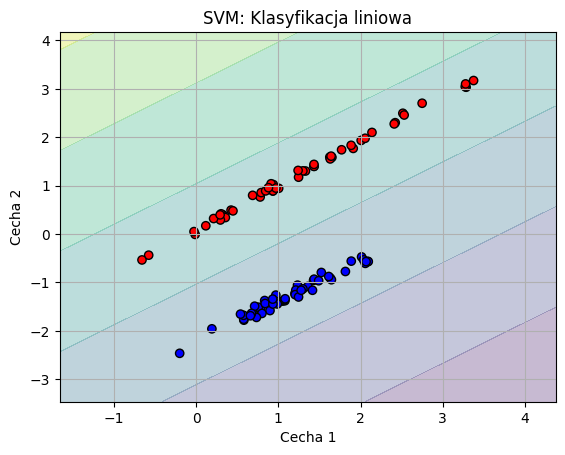

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# Dane
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1.2, random_state=42)

# Model
clf = SVC(kernel='linear')  # liniowe SVM
clf.fit(X, y)

# Wykres z granicą decyzyjną
plt.figure(figsize=(8, 5))
DecisionBoundaryDisplay.from_estimator(clf, X, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("SVM: Klasyfikacja liniowa")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.grid(True)
plt.show()


#### SVM do regresji — SVR
W regresji SVM stara się znaleźć funkcję, która nie odbiega od punktów więcej niż o epsilon, a jednocześnie jest możliwie „płaska”.

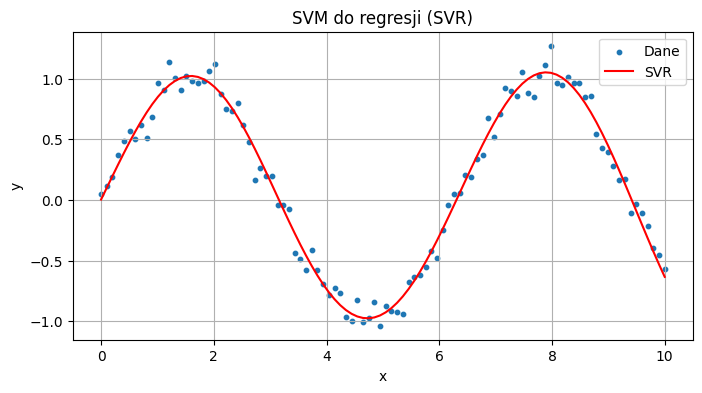

In [ ]:
from sklearn.svm import SVR

# Dane
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=100)

# Model SVR
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X, y)
y_pred = svr.predict(X)

# Wykres
plt.figure(figsize=(8, 4))
plt.scatter(X, y, s=10, label='Dane')
plt.plot(X, y_pred, color='red', label='SVR')
plt.title("SVM do regresji (SVR)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


☝ SVR nie minimalizuje MSE bezpośrednio — zamiast tego ignoruje błędy mniejsze niż epsilon, co pozwala na bardziej odporne dopasowanie.



## 3. Klasteryzacja i metryki odległości

Klasteryzacja to technika **uczenia nienadzorowanego**, której celem jest **grupowanie podobnych obserwacji** bez użycia etykiet (czyli bez `y`).

Zanim jednak nauczysz się klasteryzować dane, warto zrozumieć **jak mierzymy podobieństwo** między obserwacjami.


### 3.0 Metryki odległości

**Metryka odległości** to sposób porównywania dwóch punktów w przestrzeni cech. Najczęściej używane to:

- Euklidesowa
- Kosinusowa


#### 3.0.0 Euklidesowa (Euclidean distance)

Najbardziej intuicyjna — to po prostu zwykła odległość „w linii prostej” między dwoma punktami w przestrzeni wielowymiarowej:

$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + \dots + (x_n - y_n)^2}
$$

Gdzie:
- $\mathbf{x}$ i $\mathbf{y}$ to dwa punkty w przestrzeni,
- $n$ to liczba cech (wymiarów).

💡 W Pythonie możesz policzyć tę odległość np. za pomocą `numpy.linalg.norm(x - y)` lub `scipy.spatial.distance.euclidean(x, y)`.


#### 3.0.1 Kosinusowa (Cosine similarity)

Mierzy **kąt między wektorami**, ignorując ich długość — jest świetna dla danych tekstowych i wektorów rzadkich (np. TF-IDF):

$$
\text{cosine\_similarity}(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\| \cdot \|\mathbf{y}\|}
$$

- Cosine similarity mieści się w przedziale \([-1, 1]\)  
- Im bliżej 1 — tym bardziej podobne są kierunki wektorów


### 3.0.2 Porównanie metryk

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

# Dwa punkty
x = np.array([[1, 2]])
y = np.array([[2, 4]])

# Euklidesowa
dist = euclidean_distances(x, y)[0][0]
# Cosine
cos_sim = cosine_similarity(x, y)[0][0]

print(f"Odległość euklidesowa: {dist:.3f}")
print(f"Cosine similarity: {cos_sim:.3f}")

Odległość euklidesowa: 2.236
Cosine similarity: 1.000


☝ Dwa punkty mogą być bardzo oddalone euklidesowo, ale mieć cosine similarity bliską 1 (jeśli są współliniowe).

❓ Poczytaj o innych metrykach odległości, np. manhattan

### 3.1 Metoda najbliższych sąsiadów (KNN)

**KNN** to jeden z najprostszych i najbardziej intuicyjnych algorytmów klasyfikacyjnych (może też działać jako regresor).

W przeciwieństwie do wielu innych modeli, **KNN nie buduje funkcji uczącej** — zamiast tego przechowuje cały zbiór treningowy i dokonuje predykcji **"na żądanie"** (tzw. model leniwy).

#### Jak działa KNN?

1. Podajemy wartość `k` — czyli liczbę sąsiadów, których bierzemy pod uwagę.
2. Dla nowej próbki, algorytm:
   - Oblicza odległości między nią a wszystkimi punktami treningowymi (np. Euklidesowa, **cosine similarity**, Manhattan).
   - Wybiera `k` najbliższych punktów.
   - Głosuje, która z klas pojawia się najczęściej wśród tych sąsiadów (w przypadku klasyfikacji).
3. Przypisuje nowej próbce **etykietę większości** z tych `k` sąsiadów.

---

💡 **Brak procesu uczenia** — cały zbiór treningowy musi być dostępny w czasie predykcji.

In [ ]:
# Sztucznie generujemy dane, które da się ładnie sklasteryzować / sklasyfikować
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.inspection import DecisionBoundaryDisplay

# liczba klastrów = 3
n_classes = 3
random_state = 42

# Generowanie danych 2D dla 3 klas
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_classes=n_classes,
    n_clusters_per_class=1,
    n_redundant=0,
    class_sep=1.5,
    random_state=random_state
)

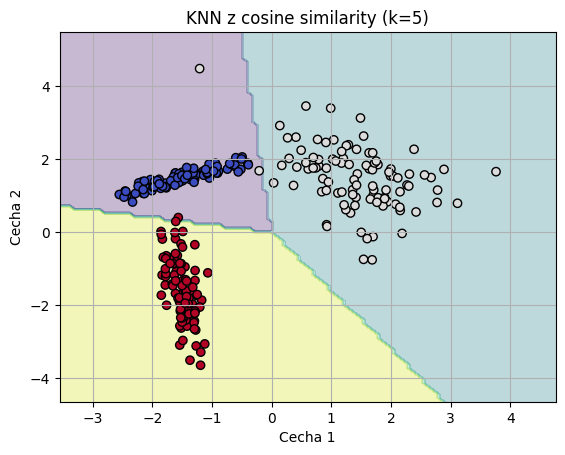

In [ ]:
# KNN z metryką cosine similarity
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X, y)

# Wizualizacja granic decyzyjnych
DecisionBoundaryDisplay.from_estimator(knn, X, response_method="predict", alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("KNN z cosine similarity (k=5)")
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.grid(True)
plt.show()

💡 W KNeighborsClassifier możesz zmieniać metrykę (metric='euclidean', 'cosine', 'manhattan' itd.)



### 3.2 K średnich (KMeans)

KMeans to prosty, szybki i często stosowany algorytm klasteryzacji. Dzieli dane na `k` grup (klastry), minimalizując **sumę odległości punktów od ich centroidów**.

1. Wybieramy liczbę klastrów `k`.
2. Losowo wybieramy `k` punktów jako **centroidy początkowe**.
3. Każdy punkt przypisujemy do najbliższego centroidu (np. wg odległości euklidesowej).
4. Obliczamy nowe centroidy jako średnią punktów w każdym klastrze.
5. Powtarzamy kroki 3–4 aż do stabilizacji (brak zmian w przypisaniach).

💡 *To metoda iteracyjna — wynik może zależeć od punktów startowych.*


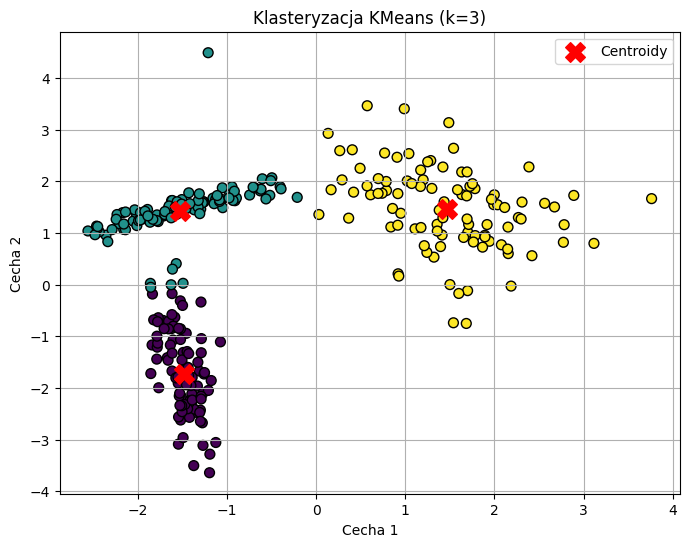

In [ ]:
# Klasteryzacja KMeans (na tych samych danych!)
kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Wizualizacja klastrów
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroidy')
plt.title('Klasteryzacja KMeans (k=3)')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()
plt.grid(True)
plt.show()

❓ Porównaj te algorytmy - który zadziałał lepiej? Jakie mają wady/zalety?

### 3.3  Inne algorytmy klasteryzacji
| Algorytm                           | Opis                           | Kiedy warto używać                                 |
| ---------------------------------- | ------------------------------ | -------------------------------------------------- |
| **DBSCAN**                         | Gęstościowy — wykrywa skupiska | Gdy klastry mają dowolny kształt, szum jest obecny |
| **GMM** (*Gaussian Mixture Model*) | Probabilistyczna wersja KMeans | Gdy dane mają struktury eliptyczne                 |
| **Agglomerative Clustering**       | Hierarchiczna metoda           | Gdy chcesz analizować zależności między grupami    |


In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
X, y = load_iris(return_X_y=True) # taka jest konwencja, że X jest duże a y małe xddd

## 4. Magiczne linijki kodu, wokół których wszystko się kręci

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=True)
model = DummyClassifier(strategy = 'uniform')
model.fit(X_train, y_train) # uczenie
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.46      0.46      0.46        13
           1       0.25      0.25      0.25         8
           2       0.22      0.22      0.22         9

    accuracy                           0.33        30
   macro avg       0.31      0.31      0.31        30
weighted avg       0.33      0.33      0.33        30



array([[6, 3, 4],
       [3, 2, 3],
       [4, 3, 2]])

Praktycznie ten sam kod!!

In [26]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



array([[13,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  8]])

Brawo, wytrenowaliśmy pierwszy model! Wyniki są tak dobre, że trzeba się zastanowić, czy tu nie doszło do wycieku danych :)